<a href="https://colab.research.google.com/github/gaubeur/machine-learning/blob/master/Classificacao_com_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
#libraries auxiliares
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
#imporar a base de dados fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
print(fashion_mnist)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [ ]:
attribute_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
#informação sobre o tamamnho do array train_images
train_images.shape

(60000, 28, 28)

In [ ]:
#dados do label
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#informações sobre a base de teste
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

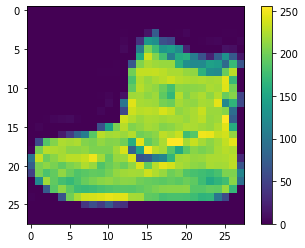

In [ ]:
#plotagem da primeira imagem
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#pré-processamento dos dados
#ajustar os pixels no intervalo de 0 e 1
train_images = train_images / 255.0
test_images  = test_images / 255.0

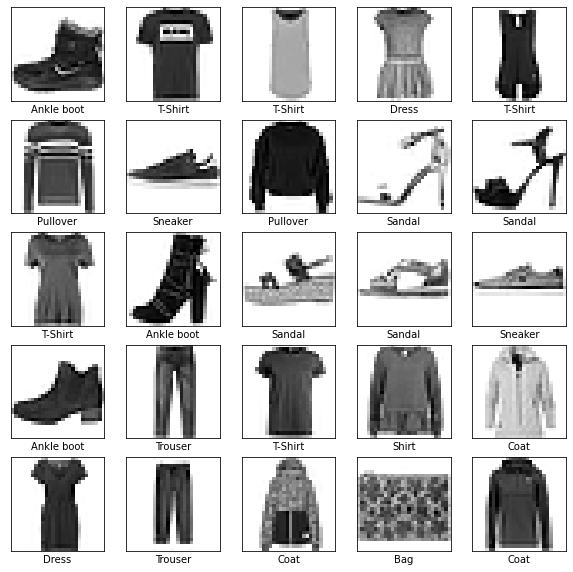

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(attribute_names[train_labels[i]])
plt.show()

In [ ]:
#montar as camadas do modelo - rede neural
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#compilar o modelo com configuração
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2312 - accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2241 - accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2172 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2087 - accuracy: 0.9221
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2049 - accuracy: 0.9216
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1978 - accuracy: 0.9249
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1916 - accuracy: 0.9276
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1867 - accuracy: 0.9302
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1813 - accuracy: 0.9315
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.176

In [ ]:
#avaliacao da acuracia
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3524 - accuracy: 0.8889


In [ ]:
print('\nTest Accuracy:', test_accuracy)


Test Accuracy: 0.8888999819755554


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
#montagem de predições
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.81832604e-07, 2.67602669e-08, 7.07368429e-07, 2.54620200e-08,
       8.29575342e-08, 2.85762246e-03, 3.35229583e-06, 1.30316950e-02,
       1.03615164e-07, 9.84106243e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'  

  plt.xlabel("{} {:2.0f}% ({})" . format(attribute_names[predicted_label],
                                         100*np.max(predictions_array),
                                         attribute_names[true_label]),
                                         color=color )


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')






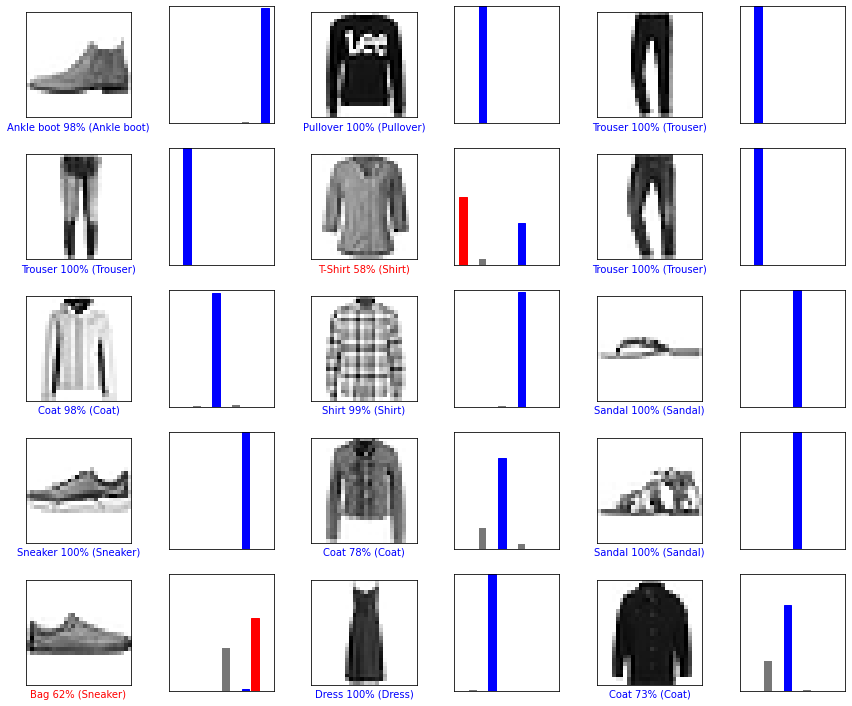

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

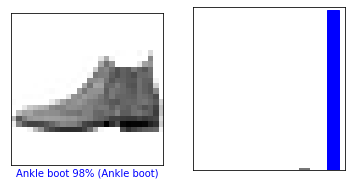

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

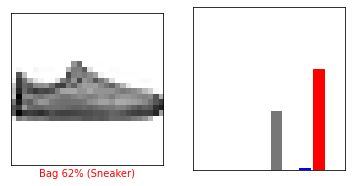

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
#grab an image from the test dataset
img = test_images[8500]

In [ ]:
print(img.shape)

(28, 28)


In [ ]:
#adiciona a imagem a um batch que possui um so nembro
img = (np.expand_dims(img,0))

In [ ]:
print(img.shape)

(1, 28, 28)


In [ ]:
#agora prediremos a label correta para essa imagem
predictions_single = model.predict(img)


In [ ]:
print(predictions_single)

[[6.7923706e-06 4.2186304e-17 1.8030710e-03 2.6228776e-07 9.3922717e-04
  9.2130207e-20 9.9725062e-01 2.3818829e-21 5.5412225e-10 1.3306360e-15]]


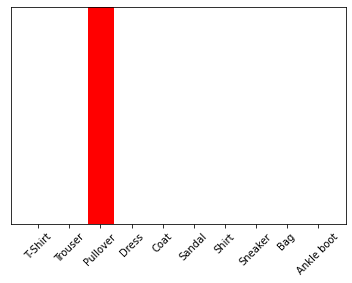

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), attribute_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

6